In [ ]:
install.packages("ggplot2movies")

In [ ]:
install.packages("maps")

In [ ]:
install.packages("data.table")

In [ ]:
install.packages("sp")

In [ ]:
install.packages("SmarterPoland")

In [ ]:
install.packages("maptools")

# ȘD - Scop Laboratorul 3
Scopul laboratarului 3 de Știința Datelor este:

  -  dezvoltarea capacității de filtrare a datelor
  -  dezvoltarea capacității de structurare a datelor
  -  dezvoltarea capacității de descriere a datelor
  -  dezvoltarea capacității de a porni un proces ștințific de analiză


# Filtrare

Trebuie să avem în vedere că datele primite de la colectare în mare parte sunt brute sau neformatate. Conceptul de filtrare e un concept atât de eliminare, selecție cât și transformare. Pot fi eliminate informați incomplete, redundante, nerelevante întrebării noastre sau informații formatate greșit.

Conform procesului științific trebuie oferite publice:
  - datele îmediat după colectare
  - procesul de eliminare cu argumente pentru fiecare eliminare din setul de date
  - procesul de structurare
  - datale finale după eliminare și înainte de analiză

Acestea sunt necesare ca să poată fi validată și reprodusă munca ta științifică.
Astfel, fiecare eliminare trebuie argumentată și notată.

Probleme posbilie:
  - măsurători greșite (Ex. măsurătoriile pentru umiditate au fost puse în coloana de temperatură)
  - vaibile ce conțin rezultatul altor vairabile. (Ex. avem coloana de viteză medie, dar avem și coloanele de distanță parcursă și durată)
  - unitatea de măsură în care a fost măsurată o variabile.
  - date incomplete (Ex. NA)
  - data irelevante (Ex. vrem să vedem șomajul pentru persoane în categoria de vârstă 20-25 dar avem date pentru persoane peste 25 de ani)

## Set de date

Vom folosit datele [ https://ec.europa.eu/eurostat/databrowser/view/educ_uoe_enrt01/default/table?lang=en] prezentate în laboraotrul 2 ca exemple pentru fișierele locale, dar datele erau deja filtrate și strucutrate. Astăzi le vom lua ca date brute.

In [ ]:
library("RColorBrewer")
library("sp")
library("maptools")
library("SmarterPoland")

In [8]:
EurostatTOC <- getEurostatTOC()
euro_dataset <- EurostatTOC[grep("Students enrolled in tertiary education by education level, programme orientation, sex, type of institution and intensity of participation", EurostatTOC$title),]
data <- getEurostatRCV(kod = euro_dataset[1,"code"])
head(data)
class(data)

,unit,worktime,sector,sex,isced11,geo,time,value
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
NR_FT_PRIV_F_ED5_AT_2018,NR,FT,PRIV,F,ED5,AT,2018,8325
NR_FT_PRIV_F_ED5_BE_2018,NR,FT,PRIV,F,ED5,BE,2018,4162
NR_FT_PRIV_F_ED5_BG_2018,NR,FT,PRIV,F,ED5,BG,2018,NA
NR_FT_PRIV_F_ED5_CH_2018,NR,FT,PRIV,F,ED5,CH,2018,118
NR_FT_PRIV_F_ED5_CY_2018,NR,FT,PRIV,F,ED5,CY,2018,1260
NR_FT_PRIV_F_ED5_CZ_2018,NR,FT,PRIV,F,ED5,CZ,2018,127


[1] "data.frame"

## data.frame

După cum se observă tipul datelor noaste este data.frame. Acesta este cel mai uzual mod de a memora date. Data.frame oferă majortiatea funcțiilor de sortare. Putem vedea valoriile prezente pe o coloana cu funcția unique.

In [9]:
unique(data$worktime)
unique(data$sex)
unique(data$sector)

[1] "FT"      "PT"      "TOTAL"   "TOT_FTE"

[1] "F" "M" "T"

[1] "PRIV"     "PRIV_DEP" "PRIV_IND" "PUBL"     "TOT_SEC"

Să spunem că dorim datele despre  țară și numărul celor care urmează doctoratul în format FT în sectorul public după anul 2016 inclusiv.

In [10]:
proc_data <- data[data$isced11=="ED8" & data$worktime=="FT" & data$sector=="PUBL" & data$time>=2016, c("geo", "value")]
head(proc_data)

,geo,value
,<chr>,<dbl>
NR_FT_PUBL_F_ED8_AT_2018,AT,9097
NR_FT_PUBL_F_ED8_BE_2018,BE,4569
NR_FT_PUBL_F_ED8_BG_2018,BG,1871
NR_FT_PUBL_F_ED8_CH_2018,CH,11562
NR_FT_PUBL_F_ED8_CY_2018,CY,423
NR_FT_PUBL_F_ED8_CZ_2018,CZ,9989


In [11]:
any(is.na(proc_data$value))

[1] TRUE

Din ultima instrucțiune observăm că avem valori care sunt "NA". Acestea reprezintă problema datelor incomplete. Soluțiile de rezolvare sunt următoare: eliminarea rânduriilor, înlocuirea cu o valoare prestabilită, înlocuirea cu media sau mediana valoriilor.

Prima varaintă în eliminare rânduriilor este folosirea funcției which, care nu ia în considerare rânduriile care au valori de "NA" pe coloane date. Din această cauză suntem nevoiți să folosim și coloana value. 

In [12]:
proc_data_2 <- data[which(data$isced11=="ED8" & data$worktime=="FT" & data$sector=="PUBL" & data$time>=2016 & data$value>=0), c("geo", "value")]
any(is.na(proc_data_2$value))

[1] FALSE

Sau putem elimina rânduriile cu NA pe value de la început fonsindu-ne de operatorul "-".

In [13]:
data_2 <- data[-which(is.na(data$value)), ]
proc_data_2 <- data_2[which(data_2$isced11=="ED8" & data_2$worktime=="FT" & data_2$sector=="PUBL" & data_2$time>=2016), c("geo", "value")]
any(is.na(proc_data_2$value))

[1] FALSE

O altă variantă este folosirea funcției complete.cases() care se uită la toate coloanele și păstrează doar rânduriile comple valide.

In [14]:
data_2 <- data[complete.cases(data),]
proc_data_2 <- data_2[data_2$isced11=="ED8" & data_2$worktime=="FT" & data_2$sector=="PUBL" & data_2$time>=2016, c("geo", "value")]
any(is.na(proc_data_2$value))

[1] FALSE

Înlocuirea cu o nouă valoare se face cu ajutorul funcției is.na.

In [15]:
data_2 <- data
#data_2[is.na(data_2$value), "value"] <- 0
#data_2[is.na(data_2$value), "value"] <- mean(data_2$value, na.rm = TRUE)
data_2[is.na(data_2$value), "value"] <- class(quantile(data_2$value, probs = 0.5, na.rm = TRUE))
proc_data_2 <- data_2[data_2$isced11=="ED8" & data_2$worktime=="FT" & data_2$sector=="PUBL" & data_2$time>=2016, c("geo", "value")]
any(is.na(proc_data_2$value))

[1] FALSE

Următoarea operație disponibilă cu data.frame este sortarea. Pentru asta avem două funcții sort care ne returnează un vector sortat și order care returnează poziții elementelor într-un vector sortat.

In [16]:
head(sort(data$value, decreasing = FALSE, na.last = TRUE), n=3)

[1] 0 0 0

In [17]:
head(data[order(data$value, decreasing = FALSE, na.last = TRUE),], n=3)

,unit,worktime,sector,sex,isced11,geo,time,value
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
NR_FT_PRIV_F_ED5_HR_2018,NR,FT,PRIV,F,ED5,HR,2018,0
NR_FT_PRIV_F_ED5_LI_2018,NR,FT,PRIV,F,ED5,LI,2018,0
NR_FT_PRIV_F_ED5_PL_2018,NR,FT,PRIV,F,ED5,PL,2018,0


Uneori este necesară adăugarea unei noi coloane în tabel. În cazul nostru am vrea să vedem care este costul total al statului cu studenții în mediul universitar (ED6,ED7,ED8). Pentru un ED6 (licență) e 5 euro, pentru un ED7 (master) e 3 euro și pentru ED8 (doctorat) e 8 euro per student. Este necesar să adăugăm o nouă coloană. Pentru a calcula diferit costul vom avea 2 metode.

In [18]:
data_2 <- data
data_2$cost <- 0
data_2[data_2$isced11=="ED6", "cost"] <- 5 * data_2[data_2$isced11=="ED6", "value"]
data_2[data_2$isced11=="ED7", "cost"] <- 3 * data_2[data_2$isced11=="ED7", "value"]
data_2[data_2$isced11=="ED8", "cost"] <- 8 * data_2[data_2$isced11=="ED8", "value"]
sum(data_2$cost, na.rm = TRUE)

[1] 18695782966

In [19]:
data_2 <- data
data_2$cost <- ifelse(data_2$isced11=="ED6", 5 * data_2$value,
              ifelse(data_2$isced11=="ED7", 3 * data_2$value,
              ifelse(data_2$isced11=="ED8", 8 * data_2$value, 0)))
sum(data_2$cost, na.rm = TRUE)

[1] 18695782966

O altă instrucțiune interesantă este cea de intersectare a mai multor data frame-uri.

In [20]:
head(merge(data, data_2), n=3)

,unit,worktime,sector,sex,isced11,geo,time,value,cost
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,NR,FT,PRIV,F,ED5,AT,2005,NA,0
2,NR,FT,PRIV,F,ED5,AT,2010,NA,0
3,NR,FT,PRIV,F,ED5,AT,2012,NA,0


## data.table

Un tip folosit pentru preformanță este data.table. Aceasta deține aceleași funcționalități ca data.frame, dar sunt  optimizate. Pentru a folosi data.table trebuie să încărcăm bibloteca "data.table". Operatorul [] pentru datable are 3 zone separate prin două virgule. Prima zonă este doar pentru filtrare, A doua este pentru funcții și adăugare de coloane noi, iar a treia ce nu am folosit până acum pentru data.frame este de grupare. Important data.table se copiază prin referință și modificăriile sunt permanente.

In [21]:
library("data.table")

In [22]:
datatable <- data.table(data)
head(datatable[worktime=="FT" & sector=="PRIV" & time>=2016 & geo=="AT",
                 cost:=ifelse(isced11=="ED6", 5 * value,
                       ifelse(isced11=="ED7", 3 * value,
                       ifelse(isced11=="ED8", 8 * value, 0))),], n=3)

unit,worktime,sector,sex,isced11,geo,time,value,cost
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
NR,FT,PRIV,F,ED5,AT,2018,8325,0
NR,FT,PRIV,F,ED5,BE,2018,4162,NA
NR,FT,PRIV,F,ED5,BG,2018,NA,NA


In [23]:
datatable <- data.table(data)
datatable <- (datatable[ , cost:=ifelse(isced11=="ED6", 5 * value,
                       ifelse(isced11=="ED7", 3 * value,
                       ifelse(isced11=="ED8", 8 * value, 0))),])
datatable[,sum(cost, na.rm = TRUE),]

[1] 18695782966

In [24]:
datatable[isced11=="ED6" | isced11=="ED7" | isced11=="ED8" , list(sum=sum(cost,na.rm = TRUE), mean=mean(cost, na.rm = TRUE)), by=isced11]

isced11,sum,mean
<chr>,<dbl>,<dbl>
ED6,13887714740,1223048.4
ED7,3537295530,314454.2
ED8,1270772696,111383.4


In [25]:
head(datatable[ , .N , by=geo], n=3)

geo,N
<chr>,<int>
AT,6480
BE,6480
BG,6480


In [26]:
cols <- colnames(datatable)
setkey(datatable, unit, worktime, sector, sex, isced11, geo, time, value)
datatable_2 <- merge(datatable, datatable)
head(datatable_2, n=3)

unit,worktime,sector,sex,isced11,geo,time,value,cost.x,cost.y
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
NR,FT,PRIV,F,ED5,AT,2005,NA,0,0
NR,FT,PRIV,F,ED5,AT,2010,NA,0,0
NR,FT,PRIV,F,ED5,AT,2012,NA,0,0


## Biblioteca dplyr

Cea mai utilizată varinată de filtrare este biblioteca dplyr care lucrează asupra data.frame și data.table Această bibliotecă prezintă 6 funcții simple utilizate în acest proces. Prima este de selecție în care putem selecta să filtreze anumită coloane, incluzându-le, prin declararea, excluzandu-le prin folosirea operatorului minus, sau un range de coloane,. Filter selecteaza informațiile (rânduriile) care respectă anumite condiții logice. Arrange sortează crescător sau descrescătoare în funcție de coloane. În caz de egalitate folosește următorul parametru. Rename redenumește o coloană. Mutate creează coloane noi sau poate transforma coloane existente. Ultima funcție este summarise care poate fi folosita doar după ce datele au fost grupate după anumite coloane cu funcția group_by. Mai departe el funcționează precum mutate dar funcțiile sum,mean vor fi făcute doar pe grupuri, iar rezultatul final va conține doar grupuriile și noile coloane.

In [ ]:
library("dplyr")

### select

Pentru datele noastre nu avem nevoie de unitatea de măsură.

In [28]:
head(select(data, -unit), n=3)

,worktime,sector,sex,isced11,geo,time,value
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
NR_FT_PRIV_F_ED5_AT_2018,FT,PRIV,F,ED5,AT,2018,8325
NR_FT_PRIV_F_ED5_BE_2018,FT,PRIV,F,ED5,BE,2018,4162
NR_FT_PRIV_F_ED5_BG_2018,FT,PRIV,F,ED5,BG,2018,NA


In [29]:
head(select(data, isced11:value), n=3)

,isced11,geo,time,value
,<chr>,<chr>,<chr>,<dbl>
NR_FT_PRIV_F_ED5_AT_2018,ED5,AT,2018,8325
NR_FT_PRIV_F_ED5_BE_2018,ED5,BE,2018,4162
NR_FT_PRIV_F_ED5_BG_2018,ED5,BG,2018,NA


### filter

In [30]:
head(filter(data, worktime=="FT" & sector=="PRIV" & time>=2016 & geo=="AT"), n=3)

,unit,worktime,sector,sex,isced11,geo,time,value
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
NR_FT_PRIV_F_ED5_AT_2018,NR,FT,PRIV,F,ED5,AT,2018,8325
NR_FT_PRIV_F_ED5-8_AT_2018,NR,FT,PRIV,F,ED5-8,AT,2018,46461
NR_FT_PRIV_F_ED54_AT_2018,NR,FT,PRIV,F,ED54,AT,2018,NA


### arrange

In [31]:
head(arrange(data, desc(value), time), n=3)

,unit,worktime,sector,sex,isced11,geo,time,value
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
NR_TOTAL_TOT_SEC_T_ED5-8_EU28_2018,NR,TOTAL,TOT_SEC,T,ED5-8,EU28,2018,19969131
NR_TOTAL_TOT_SEC_T_ED5-8_EU28_2017,NR,TOTAL,TOT_SEC,T,ED5-8,EU28,2017,19772834
NR_TOTAL_TOT_SEC_T_ED5-8_EU28_2016,NR,TOTAL,TOT_SEC,T,ED5-8,EU28,2016,19590434


### rename

In [32]:
head(rename(data, year=time), n=3)

,unit,worktime,sector,sex,isced11,geo,year,value
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
NR_FT_PRIV_F_ED5_AT_2018,NR,FT,PRIV,F,ED5,AT,2018,8325
NR_FT_PRIV_F_ED5_BE_2018,NR,FT,PRIV,F,ED5,BE,2018,4162
NR_FT_PRIV_F_ED5_BG_2018,NR,FT,PRIV,F,ED5,BG,2018,NA


### mutate

In [33]:
head(mutate(data, cost=ifelse(isced11=="ED6", 5 * value,
                       ifelse(isced11=="ED7", 3 * value,
                       ifelse(isced11=="ED8", 8 * value, 0)))), n=3)

,unit,worktime,sector,sex,isced11,geo,time,value,cost
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,NR,FT,PRIV,F,ED5,AT,2018,8325,0
2,NR,FT,PRIV,F,ED5,BE,2018,4162,0
3,NR,FT,PRIV,F,ED5,BG,2018,NA,0


In [34]:
head(mutate(data, cost=value-mean(value, na.rm = TRUE)), n=3)

,unit,worktime,sector,sex,isced11,geo,time,value,cost
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,NR,FT,PRIV,F,ED5,AT,2018,8325,-113001.2
2,NR,FT,PRIV,F,ED5,BE,2018,4162,-117164.2
3,NR,FT,PRIV,F,ED5,BG,2018,NA,NA


### summarise

In [35]:
data_2 <- group_by(data, isced11)
head(summarise(data_2, sum_value=sum(value, na.rm=TRUE), mean_value=mean(value, na.rm=TRUE)), n=3)

`summarise()` ungrouping output (override with `.groups` argument)



isced11,sum_value,mean_value
<chr>,<dbl>,<dbl>
ED5,459481072,54043.88
ED5-8,4574247028,403728.78
ED54,22131754,11245.81


### operatorul %>%

Un operator important de legat operații din bibloteca dplyr, asemănător unui pipe din bash.

In [81]:
head(data %>% filter(!is.na(value)) %>% arrange(desc(value), time) %>% group_by(isced11) %>% summarise(sum_value=sum(value)), n=3)

`summarise()` ungrouping output (override with `.groups` argument)



isced11,sum_value
<chr>,<dbl>
ED5,459481072
ED5-8,4574247028
ED54,22131754


### Join

Bibloteca are și variante pentru intersectare Pentru mai multe detalii folosiți ?join în consolă.

In [37]:
head(inner_join(data, data_2, by=c("unit"="unit", "sector"="sector", "isced11"="isced11", "time"="time", "geo"="geo", "value"="value", "worktime"="worktime")), n=3)

,unit,worktime,sector,sex.x,isced11,geo,time,value,sex.y
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,NR,FT,PRIV,F,ED5,AT,2018,8325,F
2,NR,FT,PRIV,F,ED5,BE,2018,4162,F
3,NR,FT,PRIV,F,ED5,BG,2018,NA,F


## Variabile Text

Un tip de variabile speciale sunt cele text ce necesită o modificare mai atentă cu funcții speciale.
Avem funcții precum tolower(), toupper() care convertesc la litere mici, sau mari. Facem acest lucru ca să fie mai ușor de factorizat.

In [82]:
tolower("aLa")
toupper("aLa")

[1] "ala"

[1] "ALA"

Strsplit împarte în elemente de list in functie de separatorul pe care îl dăm.

In [83]:
strsplit("ALA_BALA_poRtocala", "_")

[[1]]
[1] "ALA"       "BALA"      "poRtocala"

Sub este un fel de găsește și înlocuiește în elementele vectorului, sub e doar pentru prima potrivire, în timp ece gsub este pentru toate.

In [84]:
sub("ALA", "BALA", "ALA_BALA_poRtocala_ALA")
gsub("ALA", "BALA", "ALA_BALA_poRtocala_ALA")

[1] "BALA_BALA_poRtocala_ALA"

[1] "BALA_BBALA_poRtocala_BALA"

Grep găsește posițiile în vector care se potrivesc cu o expresie regulată. Daca setăm parametrul value vom primi valaoriile în loc de poziții.

In [41]:
grep(".*ALA.*", c("ALA", "BALA", "poRtocala", "ALA"), value=FALSE)
grep(".*ALA.*", c("ALA", "BALA", "poRtocala", "ALA"), value=TRUE)

[1] 1 2 4

[1] "ALA"  "BALA" "ALA"

Bibloteca stringr oferă alte funcții necesare precum nchar – numărul de caractere, substr – un subșir, paste  concateneaza mai multți vectori de caractere folosind un separator. Strtrim eliminimă spații albe de la început și final.

In [42]:
library("stringr")

In [43]:
nchar("ALA_BALA_poRtocala_ALA")
substr("ALA_BALA_poRtocala_ALA", 5, 7)
paste("ALA_BALA","poRtocala_ALA", sep="_")
str_trim("     ALA_BALA_poRtocala_ALA      ")

[1] 22

[1] "BAL"

[1] "ALA_BALA_poRtocala_ALA"

[1] "ALA_BALA_poRtocala_ALA"

## Variabile Data/Timp Biblioteca lubridate

Un alt timp de variabile speciale sunt cele care se referă la timp și date. Prima varianta e să folosim format și să învățăm toate literele de urmează după procent sau putem folosi biblioteca lubridate care necesită doar să spui ordinea în care sunt puse informația iar în spate va căuta singură prin text. Avem funcții pentru ziua săptămânii anul și respectiv luna. Putem folosi operații aritmetice. Update pentru a actualiza anumite componente și interval pentru a vedea diferența între zile.

In [85]:
library("lubridate")

In [86]:
bday <- ymd_hms("1994 ala 05 bala 22 faa 06 rrrr 30 okdo 59")
wday(bday)
year(bday)
month(bday)
majorat <- bday + years(18) + days(4) + hours(5) + minutes(40)
update(majorat, hour=19)
secunde <- int_length(interval(bday, majorat))
as.numeric(as.duration(secunde), "days")

[1] 1

[1] 1994

[1] 5

[1] "2012-05-26 19:10:59 UTC"

[1] 6579.236

# Structurare

Mai întăi să definim ce se înțelege prin date structurate.  Noi facem un experimente în care avem măsurători în funcție de o variabilă definitorie unică la momentul măsurătorii. Fiecare element măsurat este considerat o variabilă.  Fiecare colonă din datele noastre trebuie să reprezinte o varaibilă. Fiecare rând reprezintă o observație , adică o măsurare pentru acele varibile și observația este pe un singur rând. O celulă reprezintă o singură valaore, valaorea unei variabile pentru o observație. Fiecare tabel reprezintă un experiment și trebuie să aibă fișierul lui. Tabele multiple ce oferă informații asupra aceluiași experiment dar nu preprezintă neapărat măsurători trebuie să aibă moduri de conectare între ele. Trebuie să avem antet pentru tabelul nostru cu nume explicite. La final aceste date trebuie să fie pregătite pentru analiză fără a fi nevoie de modificări ulterioare. Putem faci orice tip de analiză pe ele.


## Idei principale Structurare

  - Fiecare variabilă este prezentă într-o singură coloană
  - Fiecare observație diferită a unei variabile este într-un singur rând (fiecare observație conține toate variabilele măsurate)
  - O celulă o singură valoare
  - Un tabel pe tip de experiment
  - Tabelele multiple trebuie conectate printr-o coloana
  - Trebuie să aibă antet
  - Numele coloanelor trebuie să fie descriptive
  - Fiecare tabel are fișierul lui
  - Datele sunt pregătite pentru analiză

### Documentare proces

Tot acest proces prin care ajungem de la date brute la date structurate trebuie docuemnte și trecute într-un document numit în engleză Code Book. Acesta conține informații despre variabile nume și unități de măsură. Lucruri pe care nu le putem punea neapărat în tabele. Conține informații despre deciziile pe care le-am luat de colectare,filtrare și structurare asupra datelor brute. Conține informații despre modul în care am făcut experimentele și am colectat datele. Alături de această documentare se va pune și scriptul aferent cu datele brute și datele structurate pentru ca terții să poată verifica rezultatul scriptului asupra datelor colectate este reprezentat prin datele structurate. Scriptul nu trebuie să primeasca alt parametru decât datele colectate.

  - Informații despre variabile (unități de măsură)
  - Informații despre deciziile pe care le-au luat asupra datelor brute (argumente)
  - Informații despre arhitectura experimentului
  - Informații despre colectarea datelor
  - Un script care transformă datele brute în date structurate

### Cele 5 probleme

Cele 5 mari probleme. Coloane sunt valori nu varaibile, gen anul. Coloanele conțin mai multe variabile. Varaibile sunt și pe rânduri și pe coloane. Datele de la mai multe experiemnte sunt in acelasi tabel. Sau experiemntul este in mai multe tabele.s

  - (P1) Coloanele sunt valori, nu variabile
  - (P2) Coloanele conțin mai multe variabile
  - (P3) Variabile sunt și pe rânduri și pe coloane
  - (P4) Mai multe experimente în același tabel
  - (P5) Același experiment în mai multe tabele


## Biblioteca tidyr

Cea mai utilizată librărie creată chiar de cel ce a definit termenul de date structurate.

In [46]:
library("tidyr")

### gather

Gather este rezorvarea P1 coloane sunt valori. Preia mai multe coloane si le pune numele lor in coloana variabile și valoriile în coloana valori. Prin bibloteca ce preia datele de pe eurostat se face automat și o ordoanre a datelor, dar date iniițiale pe eurostat dacă le descărcați are o coloană pentru fiecare an, unde espre rezentat numărul de persoane ca valaore. Vom întoarce procesul înapoi și după vom folosi gather să rezolvăm problema inițială.

In [132]:
data_spread <- spread(data, key="time", value="value")
head(data_spread)

,unit,worktime,sector,sex,isced11,geo,2005,2010,2012,2013,2014,2015,2016,2017,2018
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NR,FT,PRIV,F,ED5,AT,NA,NA,NA,7576,7662,8161,7933,8157,8325
2,NR,FT,PRIV,F,ED5,BE,NA,NA,NA,4441,4766,4741,4721,4454,4162
3,NR,FT,PRIV,F,ED5,BG,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NR,FT,PRIV,F,ED5,CH,NA,NA,NA,4537,4153,4532,473,126,118
5,NR,FT,PRIV,F,ED5,CY,NA,NA,NA,1769,1440,1442,1238,1268,1260
6,NR,FT,PRIV,F,ED5,CZ,NA,NA,NA,101,106,122,149,150,127


In [133]:
data_2 <- gather(data_spread, "2005":"2018", key="year", value="PersonsNumber")
head(data_2)

,unit,worktime,sector,sex,isced11,geo,year,PersonsNumber
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,NR,FT,PRIV,F,ED5,AT,2005,NA
2,NR,FT,PRIV,F,ED5,BE,2005,NA
3,NR,FT,PRIV,F,ED5,BG,2005,NA
4,NR,FT,PRIV,F,ED5,CH,2005,NA
5,NR,FT,PRIV,F,ED5,CY,2005,NA
6,NR,FT,PRIV,F,ED5,CZ,2005,NA


### spread

A doua  problema este rezolvată de funcția spread varaibilele ce vor deveni coloane sunt in coloana variabile iar valoriile sunt in coloana valori. P3 e rezolvat de gather și spread.  Putem lua exemplu "greșit" în care considerăm anii o variabilă.

In [89]:
data_spread <- spread(data, key="time", value="value")
head(data_spread)

,unit,worktime,sector,sex,isced11,geo,2005,2010,2012,2013,2014,2015,2016,2017,2018
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NR,FT,PRIV,F,ED5,AT,NA,NA,NA,7576,7662,8161,7933,8157,8325
2,NR,FT,PRIV,F,ED5,BE,NA,NA,NA,4441,4766,4741,4721,4454,4162
3,NR,FT,PRIV,F,ED5,BG,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NR,FT,PRIV,F,ED5,CH,NA,NA,NA,4537,4153,4532,473,126,118
5,NR,FT,PRIV,F,ED5,CY,NA,NA,NA,1769,1440,1442,1238,1268,1260
6,NR,FT,PRIV,F,ED5,CZ,NA,NA,NA,101,106,122,149,150,127


### drop_na


Următoarele funcții sunt pentru ștergereea na sau înlocuirea na cu anumite valori. 

drop_na elimină rânduri cu NA. 

In [50]:
data_3 <- drop_na(data_2)
head(data_3)

,unit,worktime,sector,sex,isced11,geo,year,PersonsNumber
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,NR,TOTAL,TOT_SEC,F,ED5,AT,2005,49574
2,NR,TOTAL,TOT_SEC,F,ED5,BE,2005,3637
3,NR,TOTAL,TOT_SEC,F,ED5,CY,2005,2949
4,NR,TOTAL,TOT_SEC,F,ED5,FI,2005,30
5,NR,TOTAL,TOT_SEC,F,ED5,FR,2005,291758
6,NR,TOTAL,TOT_SEC,F,ED5,HU,2005,15027


fill înlocuiește cu valori de mai sus din table sau de mai jos.

In [51]:
data_3 <- fill(data_spread, "2016", .direction="down")
head(data_3[,c("2013","2014","2015","2016")])

,2013,2014,2015,2016
,<dbl>,<dbl>,<dbl>,<dbl>
1,7576,7662,8161,7933
2,4441,4766,4741,4721
3,NA,NA,NA,4721
4,4537,4153,4532,473
5,1769,1440,1442,1238
6,101,106,122,149


replace_na înlocuiește cu valori pe coloanele date.

In [52]:
data_3 <- replace_na(data_spread, list("2015"=2,"2016"=3))
head(data_3[,c("2013","2014","2015","2016")])

,2013,2014,2015,2016
,<dbl>,<dbl>,<dbl>,<dbl>
1,7576,7662,8161,7933
2,4441,4766,4741,4721
3,NA,NA,2,3
4,4537,4153,4532,473
5,1769,1440,1442,1238
6,101,106,122,149


### separate

Separate e folosit când avem mai multe valori într-o singură celulă. Separa dupa alfanumerice.
În prima fază vom uni coloanele cu ani și toate valoriile per an.

In [53]:
data_spread_col <- colnames(data_spread)
data_spread_col <- data_spread_col[7:15]
data_3 <- unite(data_spread,data_spread_col, col="Years", sep="_", remove=TRUE) 
head(data_3)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(data_spread_col)` instead of `data_spread_col` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



,unit,worktime,sector,sex,isced11,geo,Years
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,NR,FT,PRIV,F,ED5,AT,NA_NA_NA_7576_7662_8161_7933_8157_8325
2,NR,FT,PRIV,F,ED5,BE,NA_NA_NA_4441_4766_4741_4721_4454_4162
3,NR,FT,PRIV,F,ED5,BG,NA_NA_NA_NA_NA_NA_NA_NA_NA
4,NR,FT,PRIV,F,ED5,CH,NA_NA_NA_4537_4153_4532_473_126_118
5,NR,FT,PRIV,F,ED5,CY,NA_NA_NA_1769_1440_1442_1238_1268_1260
6,NR,FT,PRIV,F,ED5,CZ,NA_NA_NA_101_106_122_149_150_127


In [54]:
data_4 <- separate(data_3, "Years", into = data_spread_col, sep="_")
head(data_4)

,unit,worktime,sector,sex,isced11,geo,2005,2010,2012,2013,2014,2015,2016,2017,2018
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,NR,FT,PRIV,F,ED5,AT,NA,NA,NA,7576,7662,8161,7933,8157,8325
2,NR,FT,PRIV,F,ED5,BE,NA,NA,NA,4441,4766,4741,4721,4454,4162
3,NR,FT,PRIV,F,ED5,BG,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NR,FT,PRIV,F,ED5,CH,NA,NA,NA,4537,4153,4532,473,126,118
5,NR,FT,PRIV,F,ED5,CY,NA,NA,NA,1769,1440,1442,1238,1268,1260
6,NR,FT,PRIV,F,ED5,CZ,NA,NA,NA,101,106,122,149,150,127


### separate_rows

Separete_row când avem pe același rând mai multe observații. Separă după o coloană în duncție de separatoare alfanumerice.

In [55]:
data_4 <- separate_rows(data_3, "Years", sep="_")
head(data_4)

unit,worktime,sector,sex,isced11,geo,Years
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NR,FT,PRIV,F,ED5,AT,NA
NR,FT,PRIV,F,ED5,AT,NA
NR,FT,PRIV,F,ED5,AT,NA
NR,FT,PRIV,F,ED5,AT,7576
NR,FT,PRIV,F,ED5,AT,7662
NR,FT,PRIV,F,ED5,AT,8161


### unite

Unite unește două coloane cu separator. Când Variabila e pe mai multe coloane. Remove elimină coloanele vechi.

In [56]:
data_spread_col <- colnames(data_spread)
data_spread_col <- data_spread_col[7:15]
data_3 <- unite(data_spread, data_spread_col, col="Years", sep="_", remove=TRUE) 
head(data_3)

,unit,worktime,sector,sex,isced11,geo,Years
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,NR,FT,PRIV,F,ED5,AT,NA_NA_NA_7576_7662_8161_7933_8157_8325
2,NR,FT,PRIV,F,ED5,BE,NA_NA_NA_4441_4766_4741_4721_4454_4162
3,NR,FT,PRIV,F,ED5,BG,NA_NA_NA_NA_NA_NA_NA_NA_NA
4,NR,FT,PRIV,F,ED5,CH,NA_NA_NA_4537_4153_4532_473_126_118
5,NR,FT,PRIV,F,ED5,CY,NA_NA_NA_1769_1440_1442_1238_1268_1260
6,NR,FT,PRIV,F,ED5,CZ,NA_NA_NA_101_106_122_149_150_127


# Descriere

In [57]:
summary(data)
str(data)
quantile(data$value, probs=c(0.1,0.3,0.5,0.7), na.rm = TRUE)
table(data$geo)

     unit             worktime            sector              sex           
 Length:239760      Length:239760      Length:239760      Length:239760     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   isced11              geo                time               value         
 Length:239760      Length:239760      Length:239760      Min.   :       0  
 Class :character   Class :character   Class :character   1st Qu.:     111  
 Mode  :character   Mode  :character   Mode  :character   Median :    3239  
                                                          Mean   :  121326  

'data.frame':	239760 obs. of  8 variables:
 $ unit    : chr  "NR" "NR" "NR" "NR" ...
 $ worktime: chr  "FT" "FT" "FT" "FT" ...
 $ sector  : chr  "PRIV" "PRIV" "PRIV" "PRIV" ...
 $ sex     : chr  "F" "F" "F" "F" ...
 $ isced11 : chr  "ED5" "ED5" "ED5" "ED5" ...
 $ geo     : chr  "AT" "BE" "BG" "CH" ...
 $ time    : chr  "2018" "2018" "2018" "2018" ...
 $ value   : num  8325 4162 NA 118 1260 ...


10%   30%   50%   70% 
    0   268  3239 19596


       AT        BE        BG        CH        CY        CZ        DE        DK 
     6480      6480      6480      6480      6480      6480      6480      6480 
       EE        EL        ES EU27_2020      EU28        FI        FR        HR 
     6480      6480      6480      3240      3240      6480      6480      6480 
       HU        IE        IS        IT        LI        LT        LU        LV 
     6480      6480      6480      6480      6480      6480      6480      6480 
       ME        MK        MT        NL        NO        PL        PT        RO 
     6480      6480      6480      6480      6480      6480      6480      6480 
       RS        SE        SI        SK        TR        UK 
     6480      6480      6480      6480      6480      6480 

## Detalii Grafice - biblioteca ggplot2

Pentru grafice vom folosi bibloteca ggplot2 pentru care avem următorul chatsheet [ https://rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf ]. 

In [59]:
library("ggplot2")
library("ggplot2movies")
library("maps") 
set.seed(20) 

ggplot2 conține 3 concepete: cel de date pe care îl transmiteți la început cu ajutorul funcției ggplot, cel a sistemului de coordonate și cel de geom prin care spui cum reprezinți datele în sistemul cartezian. Vom inițializa toate variabilele din chatsheet. Seturiile de date sutn descrise în felul următor:
  - mpg - date economice despre 38 de modele de mașini: hwy - mile pe autostrada per galon, cty mile în oraș per galon, classs - tipul mașinii, fl - tipul de combustibil
  - map - harta regiuniilor din america prin latitiudine și longitudine
  - seals - date despre deplasăriile unei foci
  - diamonds - date despre 54 000 de diamante: price - preț, carte - carate, color - culoare de la D la J, clarity - claritate de la I1 la IF și dimensiuniile prin x,y,z
  - economics - date despre somaj in america: date - data la care au fost introduse datele, unemploy - numărul de oameni in somaj, pop - populația totală
  - movies - date despre filmele postate pe imdb: year: anul, rating - scorul date de utilizatori
  - USArrests - date despre arestăriile din statele americane

In [60]:
a <- ggplot(mpg, aes(hwy))
b <- ggplot(mpg, aes(fl))
c <- ggplot(map_data("state"), aes(long, lat))
d <- ggplot(economics, aes(date, unemploy))
e <- ggplot(seals, aes(x = long, y = lat))
f <- ggplot(mpg, aes(cty, hwy))
g <- ggplot(mpg, aes(class, hwy))
h <- ggplot(diamonds, aes(cut, color))
i <- ggplot(movies, aes(year, rating))
j <- ggplot(economics, aes(date, unemploy))
df <- data.frame(grp = c("A", "B"), fit = 4:5, se = 1:2) 
k <- ggplot(df, aes(grp, fit, ymin = fit-se, ymax = fit+se))
murder_data <- data.frame(murder = USArrests$Murder, state = tolower(rownames(USArrests))) 
state_map <- map_data("state")
l <- ggplot(murder_data, aes(fill = murder))
seals_2 <- seals
seals_2$z <- with(seals_2, sqrt(delta_long^2 + delta_lat^2)) 

Vom trece prin categoriile de geom pe rând.

### Primitive

Prima primitivă este cea de polygon. Aceasta desenează un polygon folosind pentru x prima coloana dată și pentru y a doua coloană. Folosind group vom grupa datele și vom face mai multe poligoane. Această funcție e necesară când dorim să aăugăm anumite zone în grafic ca zone de interes, sau dorim să colorăm diferit diferite grupuri folosind parametrul value.

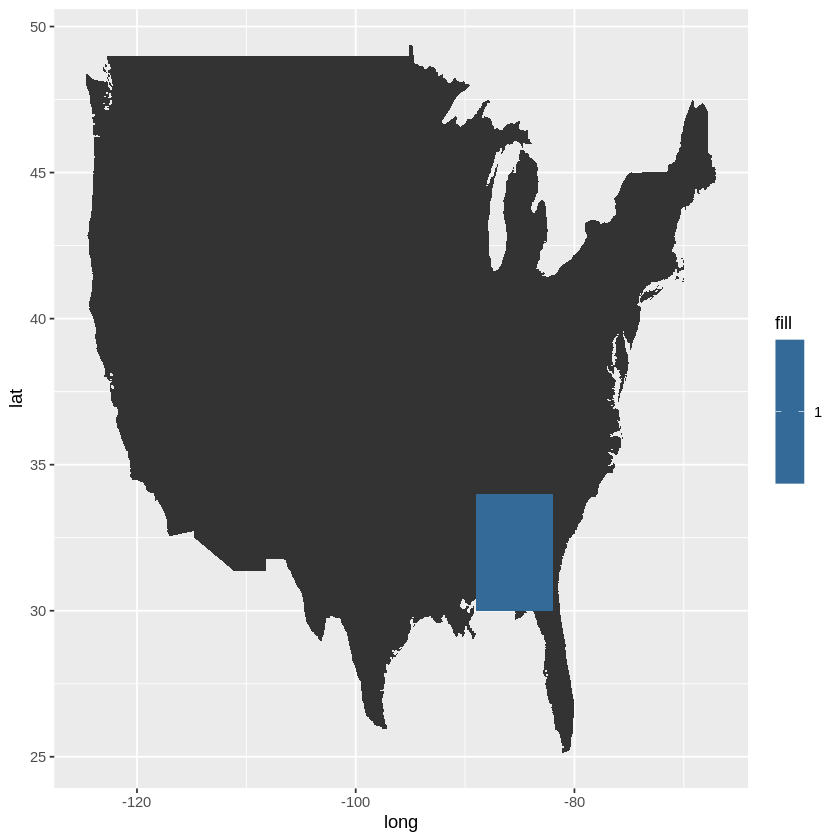

In [61]:
c + geom_polygon(aes(group = group)) + geom_polygon(data = data.frame(lat=c(30,34,34,30),long=c(-82,-82,-89,-89)), aes(fill=1))

Primitava path este leagă în ordinea în carea a primit (sa în funcție de coloana x) valoriile printr-o linie.


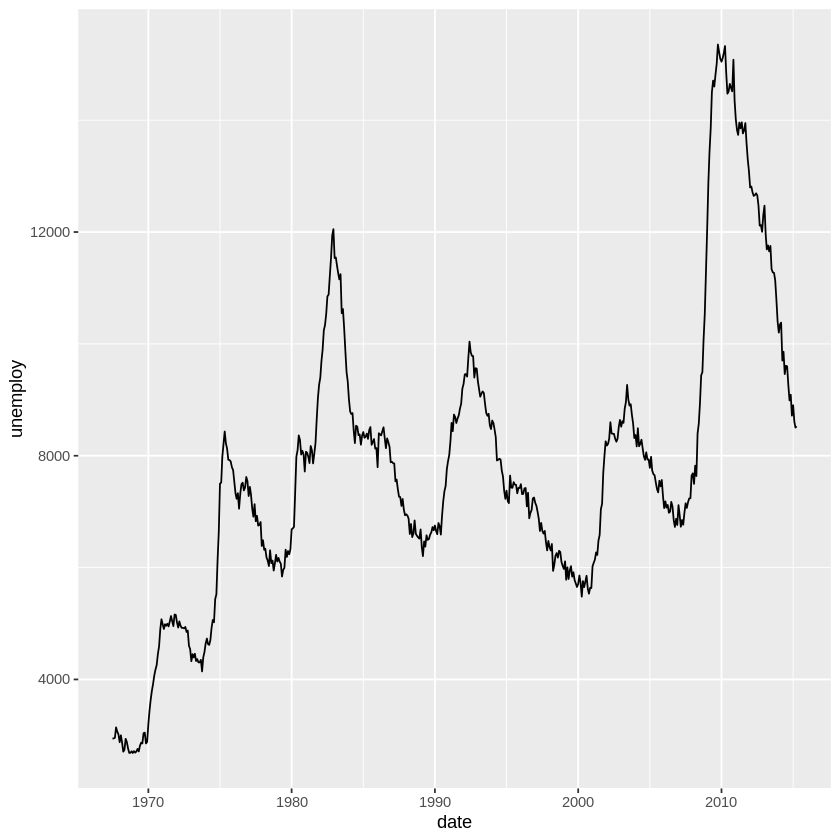

In [62]:
d + geom_path(lineend="butt", linejoin="round", linemitre=1)

Primitiva ribbon este bună atunci când vrei să adaugi deviația standard în discuție și vrei să vezi pe unde s-ar putea încadra valoriile.

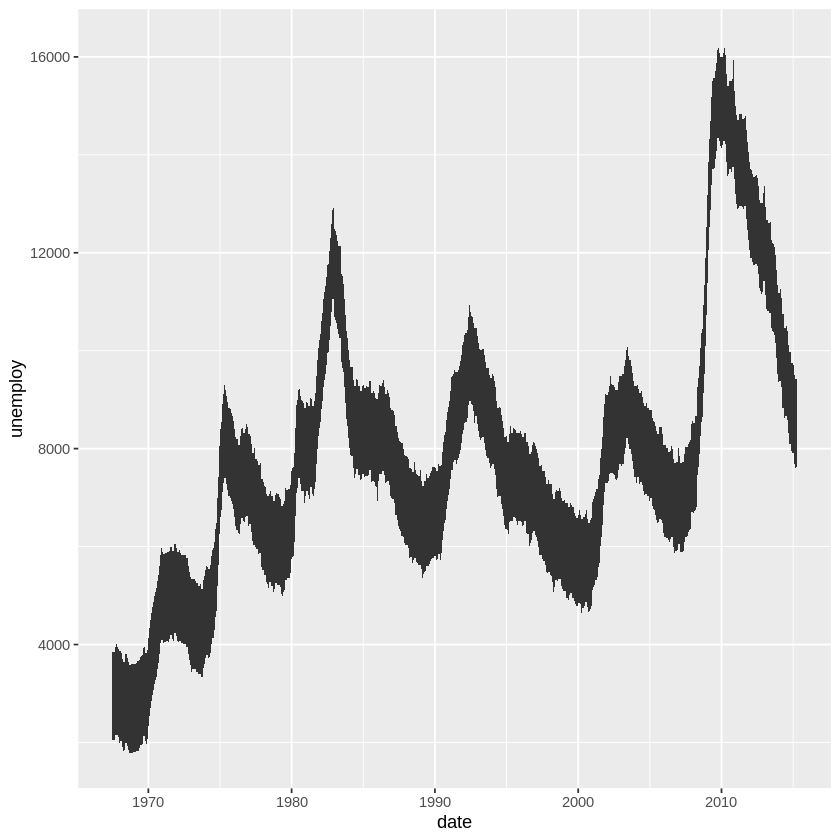

In [63]:
d + geom_ribbon(aes(ymin=unemploy - 900, ymax=unemploy + 900))

### Distribuție variabilă continuă

Pentru afișarea unei distribuții a unei varaibile continue sunt 2 funcții prinicipale, density și histogram. Histograma e folosită când vrei să consideri intervale pentru varibila respectivă. Aceste funcții transmit zona în carea variabila ta se concentrează. Poate scoate în evidență grupuri, mediana sau deviația standard. De exemplu în cazul nostru ni se transmite faptul că sunt două grupuri mari de mașini unele care fac 15 mile per galon pe autostrada și unele care fac 25, spunând astfel că ar trebui să facem o cercetare să vedem diferența dintre cele două grupuri. Histograma ne prezintă că cele mai multe mașini fac între 22.5 și 27.5 mile per galon pe autostradă.

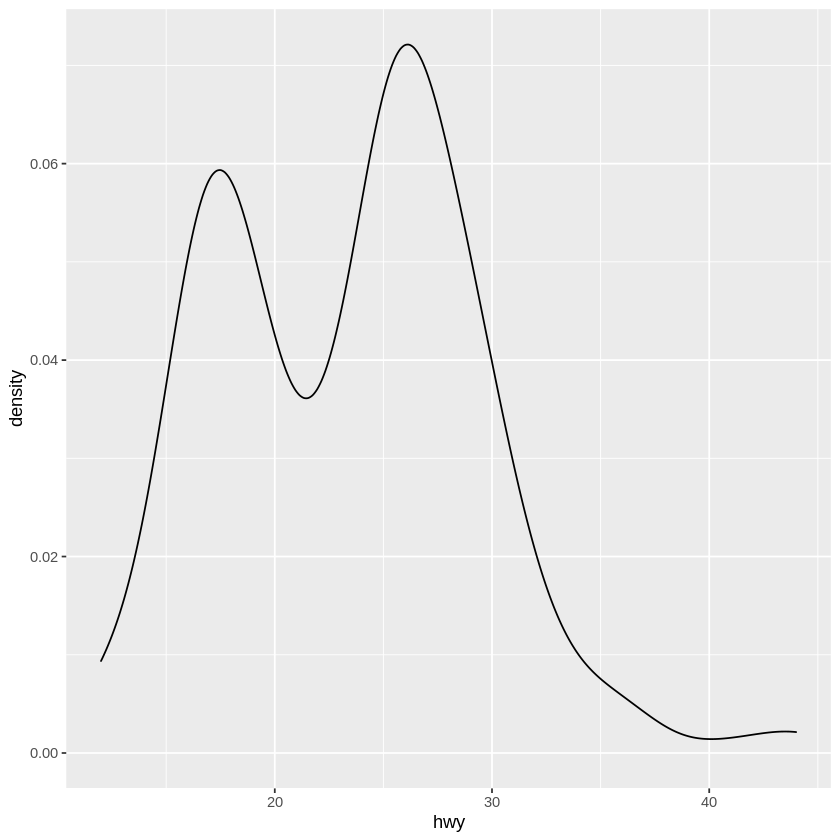

In [64]:
a + geom_density(kernel = "gaussian")

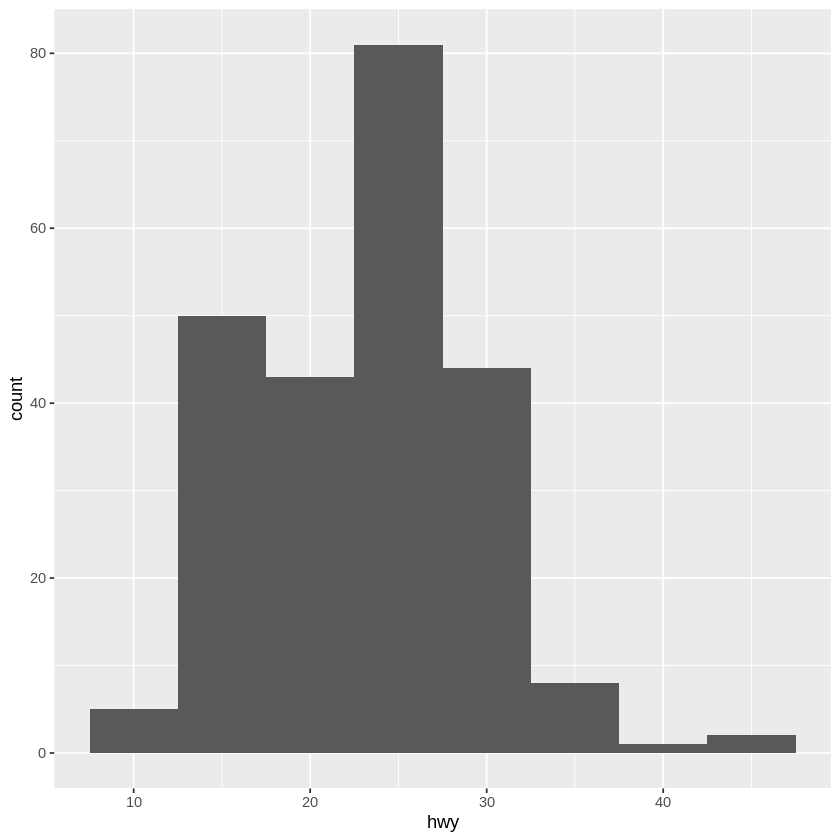

In [65]:
a + geom_histogram(binwidth = 5)

### Distribuție variabilă discretă

În cazul varaibilelor discretă cel mai bun grafic este cel prin bar care este asemător cu cel al histogramei numai că nu conține un interval de valori și doar o valoare. Acest tip este folositor pentru a vedea dacă avem o distribuție uniformă între grupuriile noastre discrete. Din păcate din acest grafic reiese că nu avem.

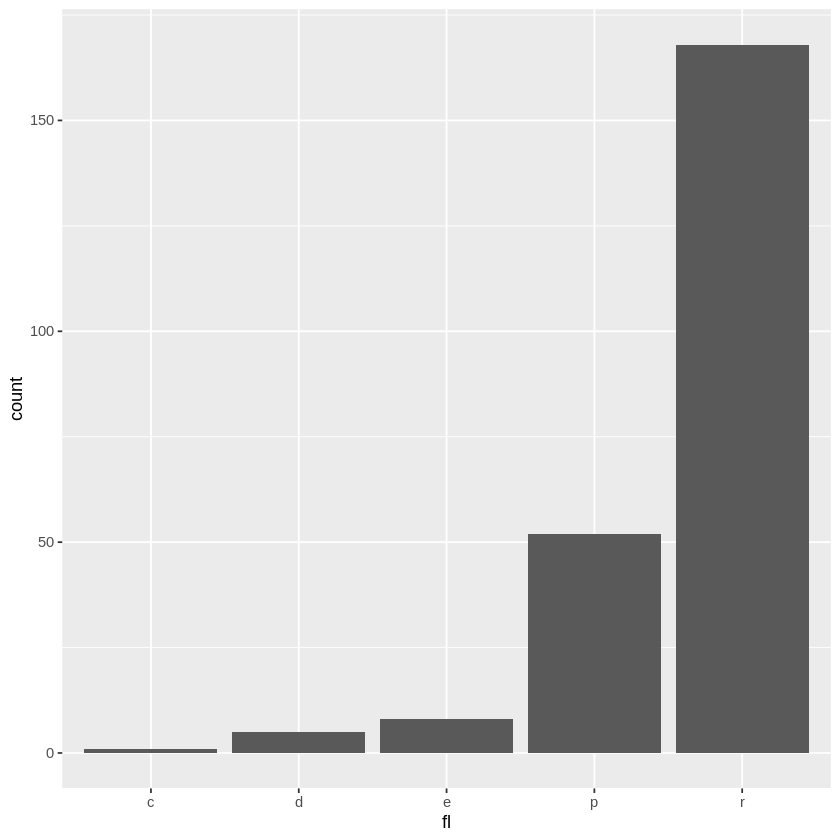

In [66]:
b + geom_bar()

### Două variabile continue

Pentru momentul când avem două variabile continue cea mai frecventă tip de geom o să fie point.

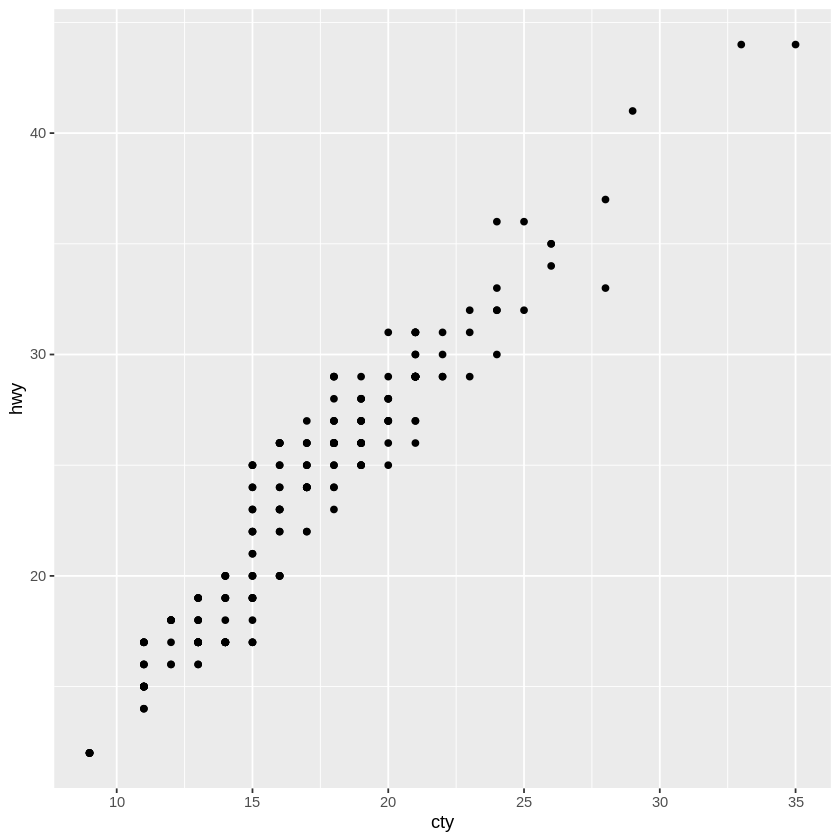

In [67]:
f + geom_point()

Desigur afiașarea nu reprezintă cu exactitate datele, pentru că sunt mai multe intrări cu aceleași valori pentru ambele variabile. PEntru asta se folosește funcții precum jitter care oferă un pic de deviere între valori.

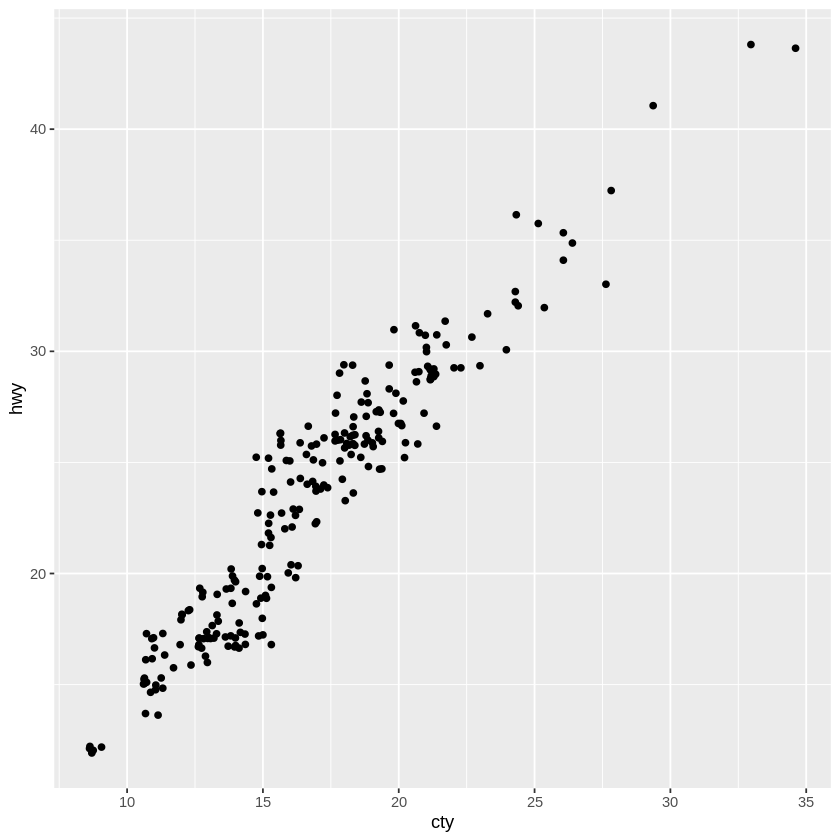

In [68]:
f + geom_jitter()

O altă funcție grafică importantă este cea de calculare a cuantilelor pentru graficul nostru și tragerea liniei reprezentative. De exemplu dorim să vedem linia sub care se află 90% dintre valori, mediana valoriilor și linia sub care sunt doar 10% dintre valori. Acestaă abordare este deseori mai potrivită decât cea folosind ribbon cu deviația standard pentru că poți observa o concentrare de valori mai ușor. În cazul nsotru putem observa o concentrare în zona valorii de 13 pentru cty și 13 pentru hwy.

Warning message:
“Computation failed in `stat_quantile()`:
  Package `quantreg` required for `stat_quantile`.
  Please install and try again.”


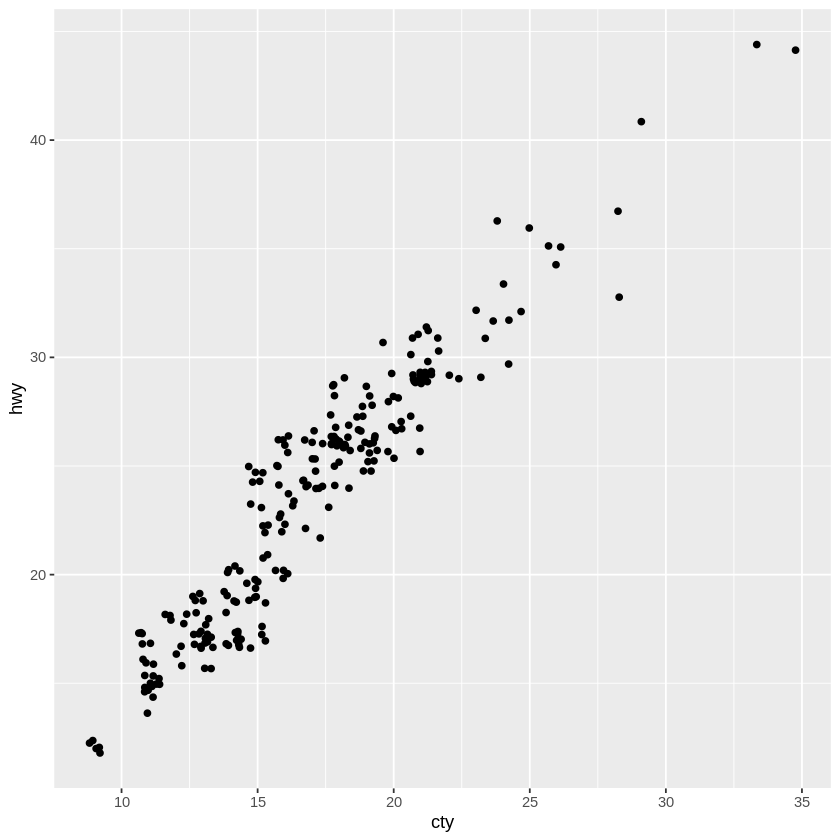

In [90]:
f + geom_jitter() + geom_quantile(method = "rqss", color="red", quantiles = c(0.1,0.5,0.9))

O altă utilizare simplistă este smooth care produce o regresie liniară asupra datelor noastre.

`geom_smooth()` using formula 'y ~ x'



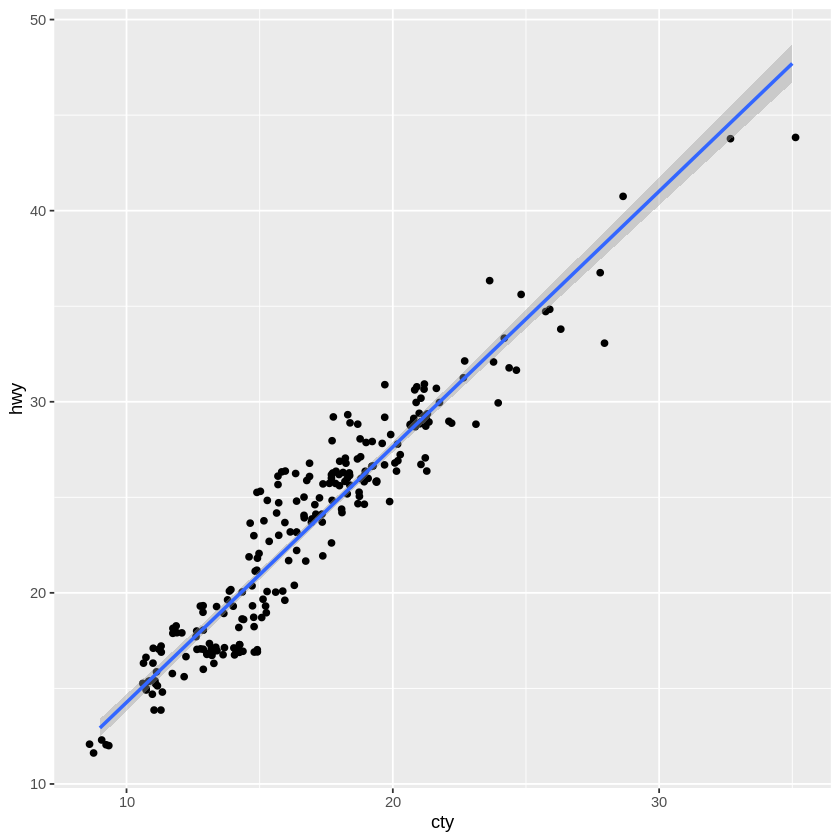

In [70]:
f + geom_jitter() + geom_smooth(method = lm)

### Variabile discretă-continuă

Pentru reprezentarea unei variabile continue în funcție de una discretă standardul neoficial din știința datelor la care s-a ajuns este cel de boxplot. Boxplot oferă următoarele detalii trei cunatile (0.25, 0.5(mediana), .075) reprezentate prin limita de sus a dreptunghiului (0.75), limita de jos (0.25) și linia din interiorul dreptunghiului(0.5-mediana). Pentru înțelege liniile trase în sus și jos trebuie calculat IQR care este diferența dinter cuantila de 0.75 și cea de 0.25. Liniile au lungimea până la cea mai mare, respectiv cel mai mică valaore dar nu mai mult de 1.5* IQR făță de dimita de sus sau de jos. Restul punctelor sunt ce nu se încadrează în această zonă sunt reprezentate individual. Boxplot sunt foarte eficiente pentru a putea observa diferențe statistice relevante între grupuri. De exemplu în grafic se obsevă o diferență între mașinile cu două locuri (2seater) și mașinile camionetă (pickup). Datorită infromațiilor relevante pe care le oferă asupra datelor și faptul că sunt așa compacte boxplot a devenit acest standard neoficial.

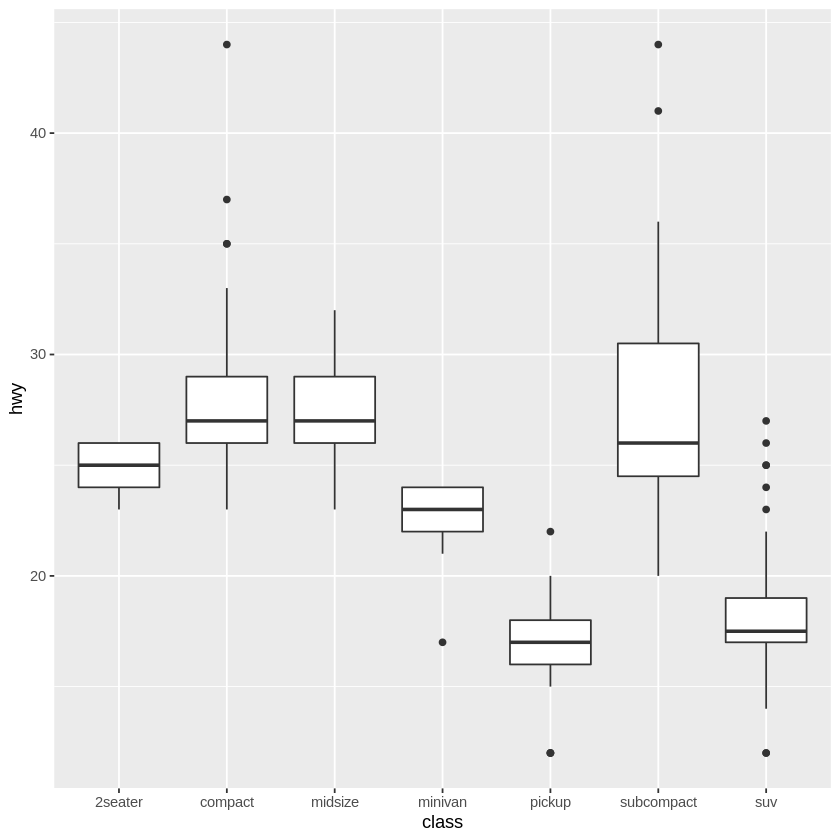

In [71]:
g + geom_boxplot()

O metodă care oferă astfel de perspectivă dar mai puțin compactă este violin.

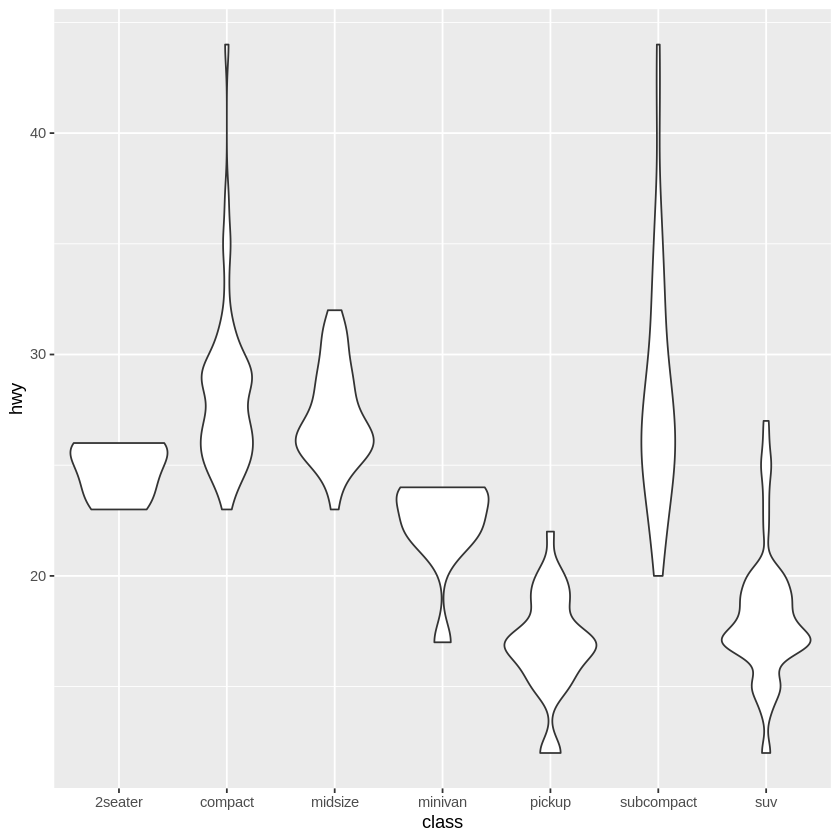

In [72]:
g + geom_violin(scale = "area")

### Variabile discretă-discretă

Pentru o distribuție a două varaibile discrete sunt două funcții principale. Mai intuitivă este cea de count care reprezintă prin mărimea punctului numărul de valori aflate în acea zonă.

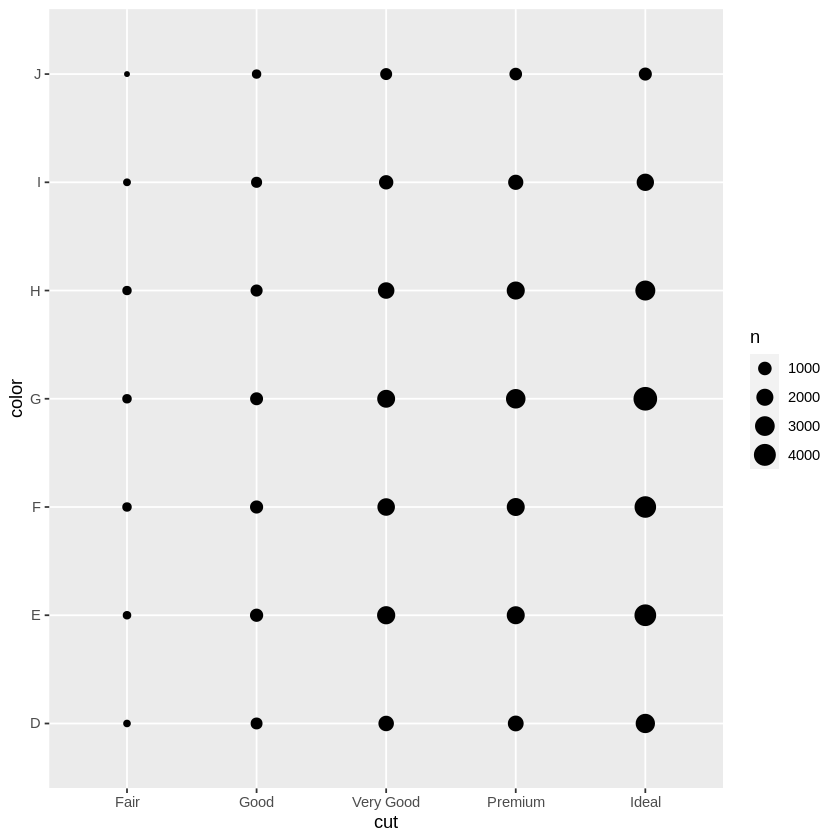

In [73]:
h + geom_count()

Cea de a doua este jitter, folosită și înainte dar care în cazul discret oferă o aglomerație a valoriilor în acel grup, fiind o viziune mai grafică.

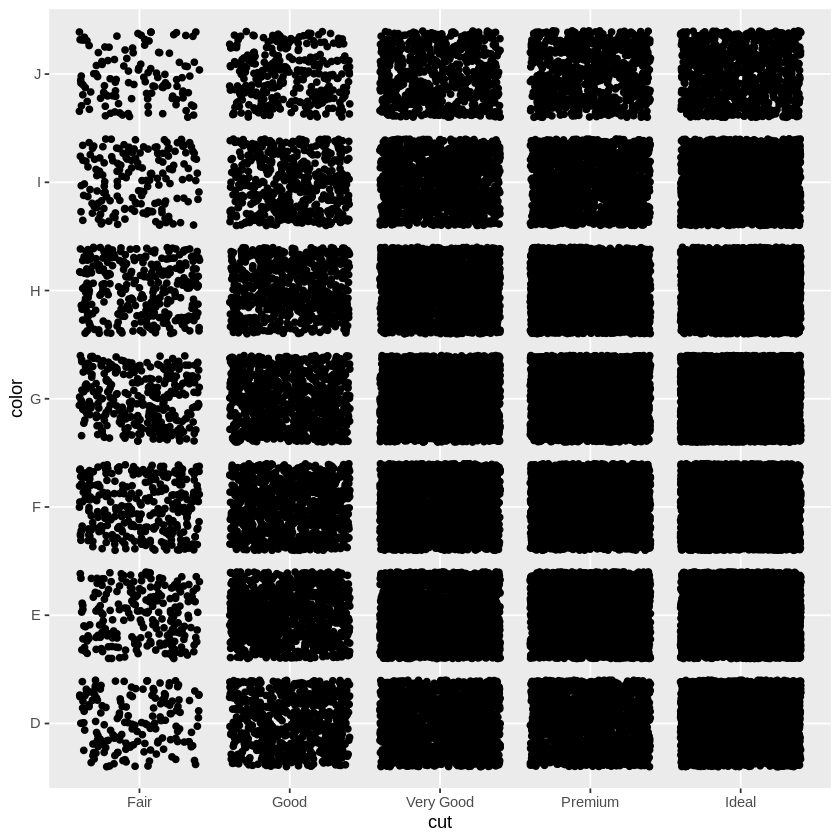

In [74]:
h + geom_jitter()

### Distribuție două variabile continue

Pentru a face o distribuție a două variabile continue, echivalentul histogramei de la o singură varaibilă continuă este bin2d, care va reprezenta prin culoare câte valori se află în acea zonă.

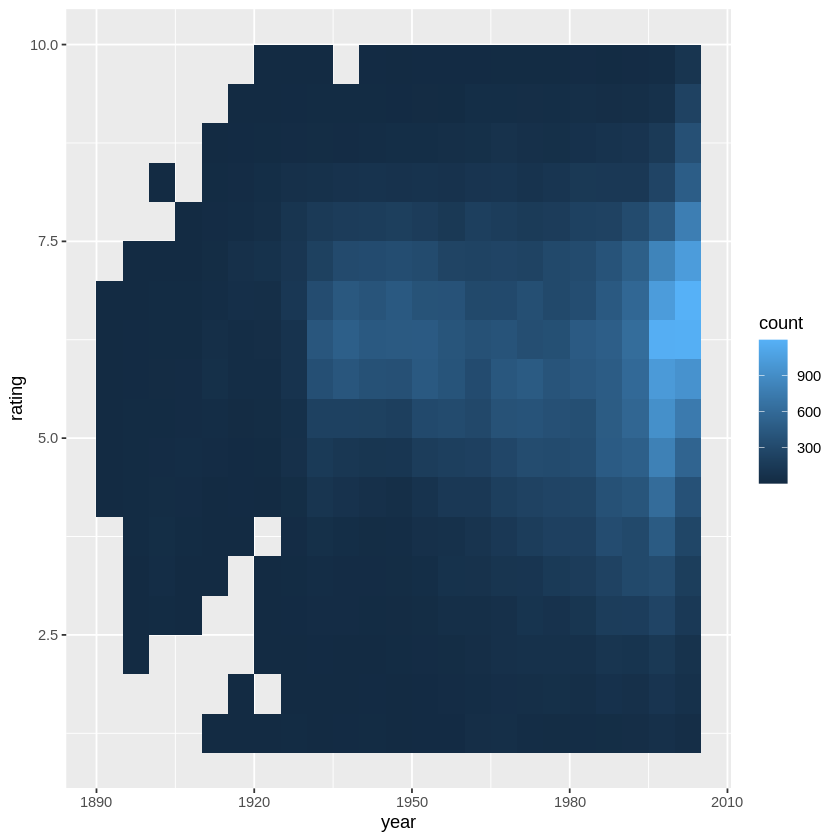

In [75]:
i + geom_bin2d(binwidth = c(5, 0.5))

### Hărți

Un alt mod de a afișa datele mai grafic este pe hărți folosind map. Trebuie setată doar coloana din date ce va fi id pentru hartă. Mai jos sunt reprezentate numărul de crime la 100 000 de locuitori din statele din america.

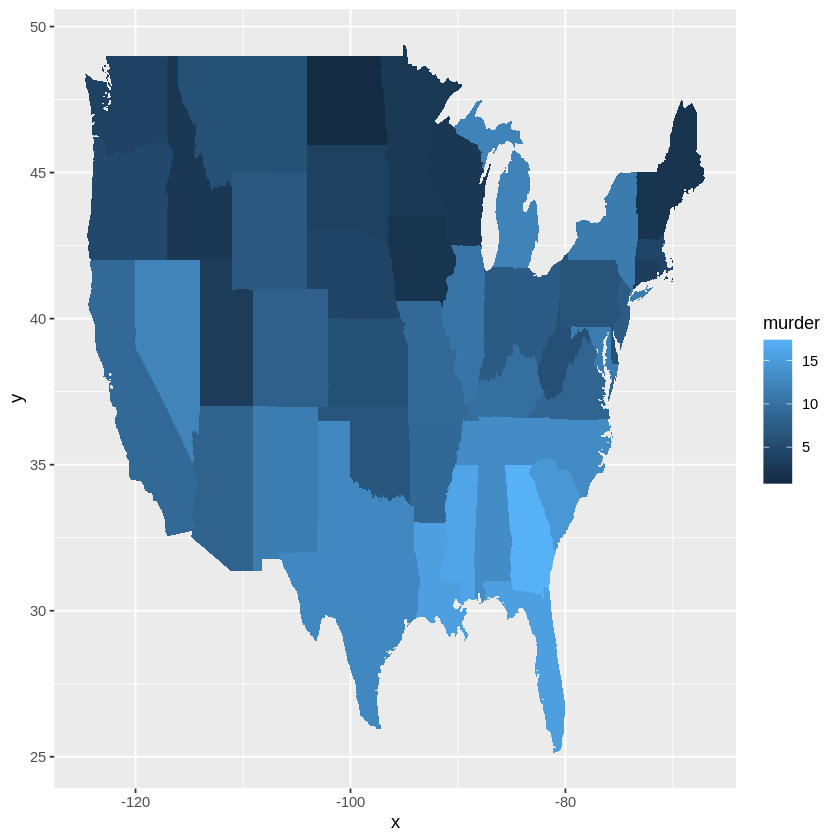

In [76]:
l + geom_map(aes(map_id = state), map = state_map) + expand_limits(x=state_map$long, y=state_map$lat)

# Exerciții

Pentru rezolvarea exercițiilor vom folosi pentru aflarea variabilelor documentul [https://eur-lex.europa.eu/LexUriServ/LexUriServ.do?uri=OJ:L:2009:086:0001:0169:EN:PDF], iar datele noastr sunt reprezentate de [https://ec.europa.eu/eurostat/cache/metadata/en/cei_cie010_esmsip2.htm#meta_update1581690031622]. De reținut că datele sunt pentru economie circulară [https://en.wikipedia.org/wiki/Circular_economy].

## Colectarea datelor

In [91]:
ex_data <- getEurostatRCV(kod = "cei_cie010")

## 1. Eliminați datele ce pot fi recalculate

Observații denumiriile pentru țăti din coloana geo:

In [92]:
unique(ex_data$geo)

[1] "AT"        "BA"        "BE"        "BG"        "CY"        "DE"       
 [7] "DK"        "EE"        "EL"        "ES"        "EU27_2007" "EU27_2020"
[13] "EU28"      "FI"        "FR"        "HR"        "HU"        "IS"       
[19] "IT"        "LT"        "LV"        "NL"        "NO"        "PL"       
[25] "PT"        "RO"        "RS"        "SE"        "SI"        "SK"       
[31] "TR"        "UK"        "MK"

Eliminați rânduriile ce conțin formațiuni de state și puneți rezultatul în ex_data_1.

In [135]:
ex_data_1 <- ex_data[nchar(ex_data$geo) == 2, ]
unique(ex_data_1$geo)

[1] "AT" "BA" "BE" "BG" "CY" "DE" "DK" "EE" "EL" "ES" "FI" "FR" "HR" "HU" "IS"
[16] "IT" "LT" "LV" "NL" "NO" "PL" "PT" "RO" "RS" "SE" "SI" "SK" "TR" "UK" "MK"

## 2. Separarea variabilelor

Observați valoriile unice din coloana indic_sb:

In [107]:
unique(ex_data_1$indic_sb)

[1] "V12150" "V12151" "V15110" "V15111" "V16110" "V16111"

Aceste valori sunt varibile folosiți funcția spread pentru a forma coloane cu aceste variabile. Salvați în ex_data_2.

In [108]:
ex_data_2 <- spread(ex_data_1, key = "indic_sb", value="value")
head(ex_data_2)

,geo,time,V12150,V12151,V15110,V15111,V16110,V16111
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AT,2008,2741.8,0.93,360.1,0.12,60267,1.47
2,AT,2009,2680.3,0.93,330.3,0.11,59770,1.47
3,AT,2010,2840.0,0.96,249.9,0.08,60002,1.46
4,AT,2011,2905.0,0.94,261.2,0.08,60791,1.46
5,AT,2012,2985.7,0.94,285.4,0.09,62075,1.48
6,AT,2013,3175.2,0.98,333.4,0.10,64278,1.52


## 3. Redenumirea Variabilelor

Dacă urmărim documentul vom vedeacă următoarele denumiri sunt pentru coduriilor varaibilelor

  - V12150 - Value added at factor cost (Mio Euro) - VFC_MilE
  - V12151 - Value added at factor cost - percentage of gross domestic product (GDP) - VFC_GDP
  - V15110 - Gross investment in tangible goods (Mio euro) GITG_MilE
  - V15111 - Gross investment in tangible goods - percentage of gross domestic product (GDP) - GITG_GDP
  - V16110 - Number of persons employed - NPE
  - V16111 - Persons employed - percentage of total employment - NPE_E

Folosiți ultimele valori pentru denumirea coloanelor în ex_data_3.

In [110]:
ex_data_3 <- rename(ex_data_2, VFC_MilE=V12150, VFC_GDP=V12151, GITG_MilE=V15110, GITG_GDP=V15111, NPE=V16110, NPE_E=V16111)
head(ex_data_3)

,geo,time,VFC_MilE,VFC_GDP,GITG_MilE,GITG_GDP,NPE,NPE_E
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AT,2008,2741.8,0.93,360.1,0.12,60267,1.47
2,AT,2009,2680.3,0.93,330.3,0.11,59770,1.47
3,AT,2010,2840.0,0.96,249.9,0.08,60002,1.46
4,AT,2011,2905.0,0.94,261.2,0.08,60791,1.46
5,AT,2012,2985.7,0.94,285.4,0.09,62075,1.48
6,AT,2013,3175.2,0.98,333.4,0.10,64278,1.52


## 4. Afișați numărul de angajați

Afișați numărul de angajați pe 2014 per fiecare țară sub formă de histogramă folosind geom_bar(stat = "identity").

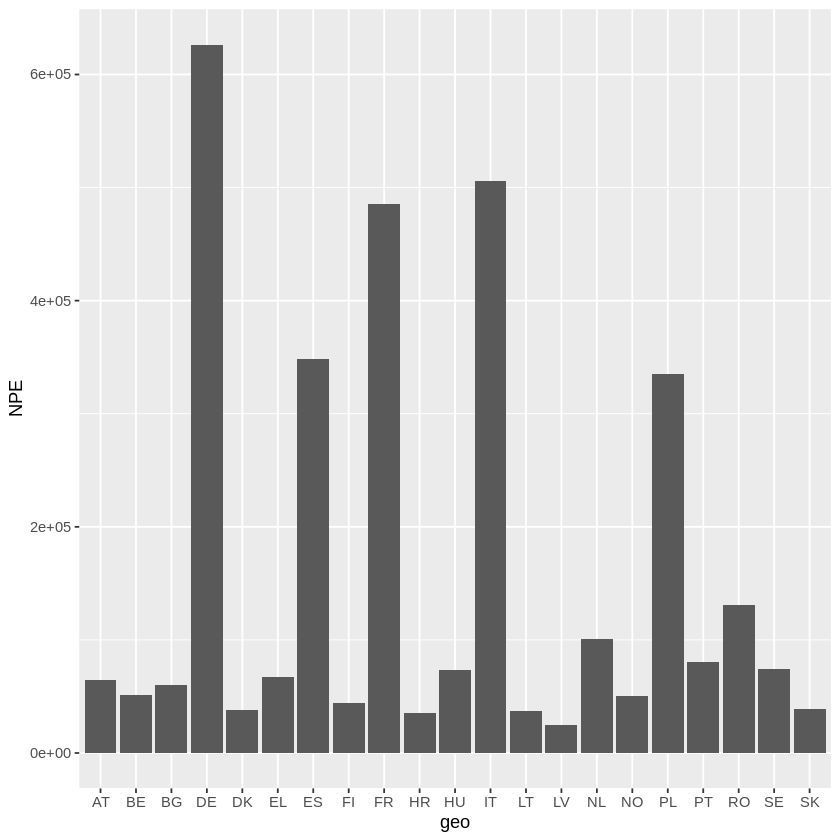

In [116]:
ex_data_4 <- ex_data_3[ex_data_3$time == 2014, ]
# head(ex_data_4)
ex_data_4 <- ex_data_4[complete.cases(ex_data_4), ]
ggplot(ex_data_4, aes(geo, NPE)) + geom_bar(stat = "identity")

## 5. Afiașți procentul de angajați în domeniul dealungul aniilor în România

Dacă observăm:

In [117]:
ex_data_5 <- ex_data_3
str(ex_data_3)

'data.frame':	300 obs. of  8 variables:
 $ geo      : chr  "AT" "AT" "AT" "AT" ...
 $ time     : chr  "2008" "2009" "2010" "2011" ...
 $ VFC_MilE : num  2742 2680 2840 2905 2986 ...
 $ VFC_GDP  : num  0.93 0.93 0.96 0.94 0.94 0.98 1.04 1.03 1.04 1.12 ...
 $ GITG_MilE: num  360 330 250 261 285 ...
 $ GITG_GDP : num  0.12 0.11 0.08 0.08 0.09 0.1 0.1 0.09 0.08 0.1 ...
 $ NPE      : num  60267 59770 60002 60791 62075 ...
 $ NPE_E    : num  1.47 1.47 1.46 1.46 1.48 1.52 1.51 1.5 1.49 1.51 ...


Variabila time conține valori sub formă de caractere. Va trebuie să convertim la număr valoriile respective cu ajutorul funcției as.numeric() .

In [122]:
ex_data_5$time <- as.numeric(ex_data_5$time)
str(ex_data_5)

'data.frame':	300 obs. of  8 variables:
 $ geo      : chr  "AT" "AT" "AT" "AT" ...
 $ time     : num  2008 2009 2010 2011 2012 ...
 $ VFC_MilE : num  2742 2680 2840 2905 2986 ...
 $ VFC_GDP  : num  0.93 0.93 0.96 0.94 0.94 0.98 1.04 1.03 1.04 1.12 ...
 $ GITG_MilE: num  360 330 250 261 285 ...
 $ GITG_GDP : num  0.12 0.11 0.08 0.08 0.09 0.1 0.1 0.09 0.08 0.1 ...
 $ NPE      : num  60267 59770 60002 60791 62075 ...
 $ NPE_E    : num  1.47 1.47 1.46 1.46 1.48 1.52 1.51 1.5 1.49 1.51 ...


Selectăm doar datele despre România și coloanele time și NPE_E pe care le afișăm cu geom_line și geom_point.

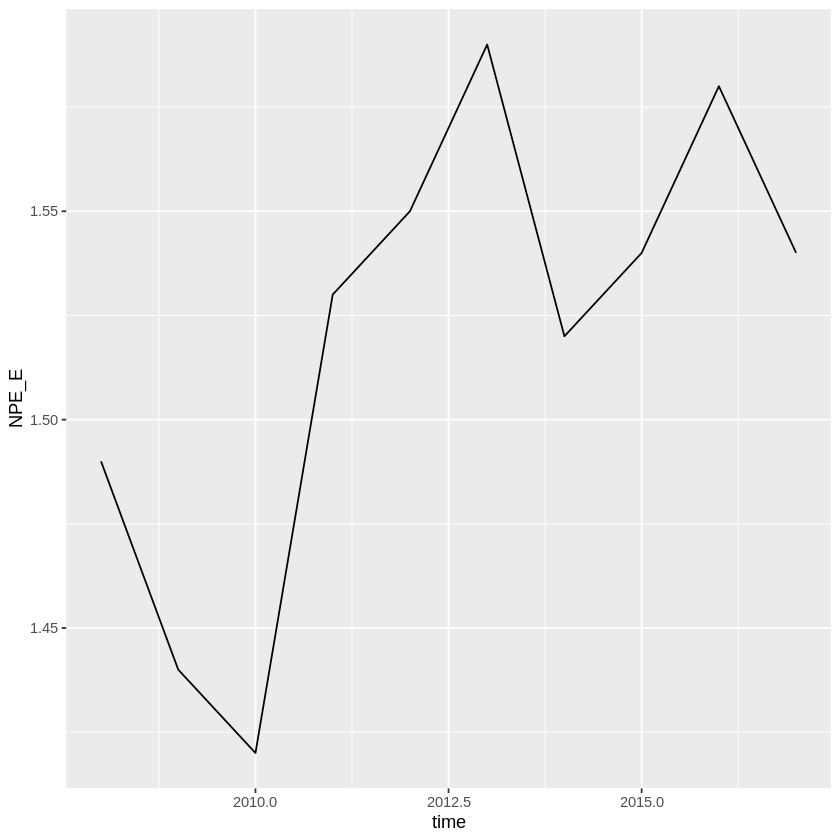

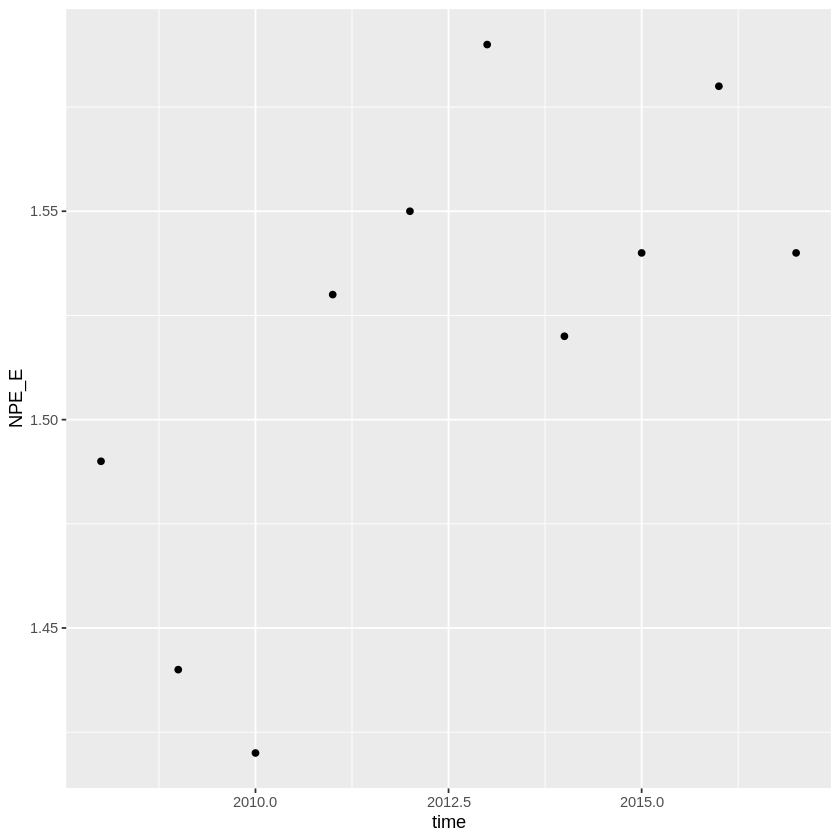

In [128]:
ex_data_5 <- ex_data_5[ex_data_5$geo == "RO", ]
# head(ex_data_5)
e5 = ggplot(ex_data_5, aes(time, NPE_E))
# geom_line
e5 + geom_path(lineend = "butt", linejoin = "round", linemitre = 1)
# geom_point
e5 + geom_point()

## 6. Afișați evoluția procentului de anajabilitate în sector

Afișați evoluția procentului de angajabilitate pentru toate țăriile grupate pe fiecare an.
Variabila discretă este time și cea continua NPE_E.

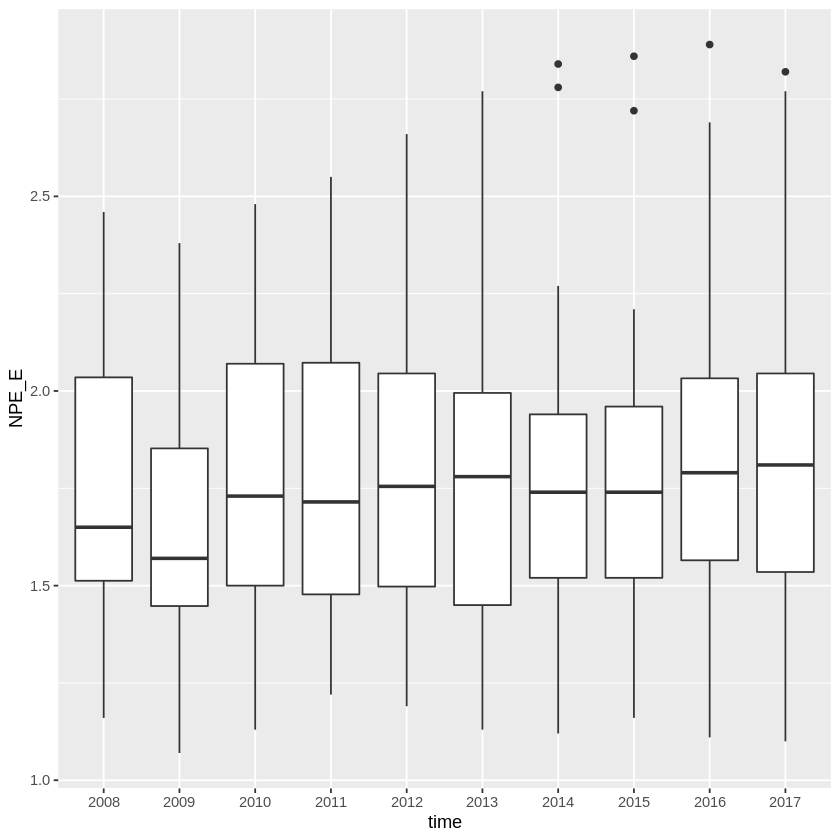

In [136]:
ex_data_6 <- ex_data_3[complete.cases(ex_data_3), ]
g = ggplot(ex_data_6, aes(time, NPE_E))
g + geom_boxplot()